# **Data Centralizada**

En el presente cuadernillo se centralizará las diversas bases de datos usadas para el proyecto de análisis del nivel de prevención de sismos en los distritos del Perú. Las fuentes de base de datos son los siguientes:
* Base de Datos de ENAHO
* Base de Datos de establecimientos de salud
* Base de Datos de sismos
* Base de Datos de tipos de suelo
* Base de Datos de Proyectos ante ocurrencias de Desastres Naturales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/TB_UBIGEOS.csv"
df_ubigeo = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
df_ubigeo = df_ubigeo[["ubigeo_inei","region","provincia","distrito"]].copy()
df_ubigeo.head()

,ubigeo_inei,region,provincia,distrito
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS
3,10104,AMAZONAS,CHACHAPOYAS,CHETO
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN


In [ ]:
# Información del tipo de datos
df_ubigeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ubigeo_inei  1893 non-null   int64 
 1   region       1893 non-null   object
 2   provincia    1893 non-null   object
 3   distrito     1893 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.3+ KB


### **Carga de Datos**

In [ ]:
# Carga de ENAHO
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO04-11.csv"
df_ENAHO0411 = pd.read_csv(filename)
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO12-22.csv"
df_ENAHO1222 = pd.read_csv(filename)
df_ENAHO0411.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,region,provincia,distrito,Key
0,2007,10202,7,6,27,0,0,0,0,0,...,0,3,19,0,37,10202,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2007
1,2007,10201,7,5,97,0,1,7,0,0,...,1,24,37,2,122,10201,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2007
2,2007,10203,7,6,16,0,0,0,0,0,...,0,4,8,0,16,10203,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2007
3,2007,10204,7,7,8,0,0,0,0,0,...,0,0,8,0,11,10204,AMAZONAS,BAGUA,EL PARCO,AMAZONASBAGUAEL PARCO2007
4,2007,10205,7,7,8,0,0,0,14,0,...,0,1,20,0,40,10205,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2007


In [ ]:
# Carga de Sismos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Sismos_completo.csv"
df_sismo = pd.read_csv(filename)
df_sismo = df_sismo.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df_sismo.head()

,key,Conteo,Promedio,Min_Mag,Max_Mag
0,AREQUIPACAYLLOMACAYLLOMA2021,50,3.804000,3.4,5.5
1,TACNATARATATARATA2021,48,3.795833,3.2,5.0
2,AREQUIPACAYLLOMAMACA2020,34,3.458824,3.2,3.9
3,PIURASULLANAMIGUEL CHECA2021,32,3.940625,3.5,4.8
4,AREQUIPACAYLLOMAPINCHOLLO2020,30,3.506667,3.3,3.9


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
def quitar_tildes(texto):
    return unidecode(texto)

In [ ]:
df_sismo['key'] = df_sismo['key'].apply(quitar_tildes)

In [ ]:
# Carga de Hospitales
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Hospitales.csv"
df_hospitales = pd.read_csv(filename)
df_hospitales.head()

,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,key
0,5.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2004
1,10.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2005
2,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2006
3,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2007
4,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2008


In [ ]:
df_hospitales['key'] = df_hospitales['key'].str.replace(' ', '')

In [230]:
# Carga de Proyectos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_proyectoFondes.csv"
df_proyectos = pd.read_csv(filename)
df_proyectos=df_proyectos[["Key","Contador"]]
df_proyectos.head()

,Key,Contador
0,ANCASHAIJAAIJA2017,3
1,ANCASHAIJACORIS2017,1
2,ANCASHAIJAHUACLLAN2017,1
3,ANCASHAIJALA MERCED2017,2
4,ANCASHAIJASUCCHA2017,1


In [ ]:
# Carga de Suelos
filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Suelos_2004_2022.csv"
df_suelos = pd.read_csv(filename)
df_suelos = df_suelos[["DPD","DESCRIPCIO"]]
df_suelos = pd.get_dummies(df_suelos,columns=["DESCRIPCIO"])
df_suelos = df_suelos.drop_duplicates(subset=['DPD'],keep='first')
df_suelos.head()

,DPD,DESCRIPCIO_Cambisol dístrico - Nitisol háplico,DESCRIPCIO_Cambisol éutrico - Phaeozem háplico,DESCRIPCIO_Cambisol éutrico - Vertisol éutrico,DESCRIPCIO_Fluvisol éutrico - Gleysol éutrico,DESCRIPCIO_Fluvisol éutrico - Regosol éutrico,DESCRIPCIO_Gleysol dístrico - Lixisol háplico - Fluvisol dístrico,DESCRIPCIO_Leptosol dístrico - Andosol úmbrico - Afloramiento lítico,DESCRIPCIO_Leptosol dístrico - Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Cambisol éutrico,DESCRIPCIO_Leptosol éutrico - Kastanozem háplico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Regosol éutrico - Afloramiento lítico,DESCRIPCIO_Lixisol háplico - Gleysol dístrico,DESCRIPCIO_Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Regosol dístrico - Cambisol dístrico,DESCRIPCIO_Regosol éutrico - Andosol móllico,DESCRIPCIO_Regosol éutrico - Calcisol háplico,DESCRIPCIO_Regosol éutrico - Cambisol éutrico
0,APURIMACABANCAYABANCAY2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,APURIMACABANCAYCHACOCHE2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,APURIMACABANCAYCIRCA2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,APURIMACABANCAYCURAHUASI2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,APURIMACABANCAYHUANIPACA2004,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### **Concatenación de Databases**

In [215]:
# Concatenar 2004 al 2012
# -> ENAHO Y SISMO
df_c1 = pd.merge(df_ENAHO0411, df_sismo, how="left", left_on=["Key"], right_on=["key"])
df_c1.drop(columns=["key"],inplace=True)
df_c1["Conteo"].fillna(0,inplace=True)
df_c1["Promedio"].fillna(0,inplace=True)
df_c1["Min_Mag"].fillna(0,inplace=True)
df_c1["Max_Mag"].fillna(0,inplace=True)

In [216]:
# -> DF Y HOSPITALES
df_c2 = pd.merge(df_c1, df_hospitales, how="left", left_on=["Key"], right_on=["key"])
df_c2.drop(columns=["key"],inplace=True)
df_c2["Categoria_I-1"].fillna(0,inplace=True)
df_c2["Categoria_I-2"].fillna(0,inplace=True)
df_c2["Categoria_I-3"].fillna(0,inplace=True)
df_c2["Categoria_I-4"].fillna(0,inplace=True)

In [232]:
# -> DF Y SUELOS
df_c3 = pd.merge(df_c2, df_suelos, how="left", left_on=["Key"], right_on=["DPD"])
df_c3.drop(columns=["DPD"],inplace=True)

In [233]:
df_c3.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,...,DESCRIPCIO_Leptosol dístrico - Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Cambisol éutrico,DESCRIPCIO_Leptosol éutrico - Kastanozem háplico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Regosol éutrico - Afloramiento lítico,DESCRIPCIO_Lixisol háplico - Gleysol dístrico,DESCRIPCIO_Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Regosol dístrico - Cambisol dístrico,DESCRIPCIO_Regosol éutrico - Andosol móllico,DESCRIPCIO_Regosol éutrico - Calcisol háplico,DESCRIPCIO_Regosol éutrico - Cambisol éutrico
0,2007,10202,7,6,27,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2007,10201,7,5,97,0,1,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2007,10203,7,6,16,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2007,10204,7,7,8,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2007,10205,7,7,8,0,0,0,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df_c3 = df_c3.fillna(0)

In [237]:
columnas_object = df_c3.select_dtypes(include=['object'])

In [238]:
columnas_object

,region,provincia,distrito,Key
0,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2007
1,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2007
2,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2007
3,AMAZONAS,BAGUA,EL PARCO,AMAZONASBAGUAEL PARCO2007
4,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2007
...,...,...,...,...
7445,UCAYALI,CORONEL PORTILLO,MASISEA,UCAYALICORONEL PORTILLOMASISEA2004
7446,UCAYALI,CORONEL PORTILLO,YARINACOCHA,UCAYALICORONEL PORTILLOYARINACOCHA2004
7447,UCAYALI,PADRE ABAD,CURIMANA,UCAYALIPADRE ABADCURIMANA2004
7448,UCAYALI,PADRE ABAD,IRAZOLA,UCAYALIPADRE ABADIRAZOLA2004


In [240]:
df_c3 = df_c3.set_index('Key')
df_c3.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,...,DESCRIPCIO_Leptosol dístrico - Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Cambisol éutrico,DESCRIPCIO_Leptosol éutrico - Kastanozem háplico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Regosol éutrico - Afloramiento lítico,DESCRIPCIO_Lixisol háplico - Gleysol dístrico,DESCRIPCIO_Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Regosol dístrico - Cambisol dístrico,DESCRIPCIO_Regosol éutrico - Andosol móllico,DESCRIPCIO_Regosol éutrico - Calcisol háplico,DESCRIPCIO_Regosol éutrico - Cambisol éutrico
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2007,2007,10202,7,6,27,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUABAGUA2007,2007,10201,7,5,97,0,1,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUACOPALLIN2007,2007,10203,7,6,16,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUAEL PARCO2007,2007,10204,7,7,8,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUAIMAZA2007,2007,10205,7,7,8,0,0,0,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
# Seleccionar solo las variables cuantitativas
clust04 = df_c3.select_dtypes(include=['int64', 'float64'])
clust04 = clust04.drop(columns=['YEAR', 'UBIGEO'])
clust04.head()

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,DESCRIPCIO_Leptosol dístrico - Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Cambisol éutrico,DESCRIPCIO_Leptosol éutrico - Kastanozem háplico - Afloramiento lítico,DESCRIPCIO_Leptosol éutrico - Regosol éutrico - Afloramiento lítico,DESCRIPCIO_Lixisol háplico - Gleysol dístrico,DESCRIPCIO_Regosol dístrico - Afloramiento lítico,DESCRIPCIO_Regosol dístrico - Cambisol dístrico,DESCRIPCIO_Regosol éutrico - Andosol móllico,DESCRIPCIO_Regosol éutrico - Calcisol háplico,DESCRIPCIO_Regosol éutrico - Cambisol éutrico
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2007,7,6,27,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUABAGUA2007,7,5,97,0,1,7,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUACOPALLIN2007,7,6,16,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUAEL PARCO2007,7,7,8,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AMAZONASBAGUAIMAZA2007,7,7,8,0,0,0,14,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
# Concatenar 2012 al 2022
# -> ENAHO Y SISMO
df_c1 = pd.merge(df_ENAHO1222, df_sismo, how="left", left_on=["Key"], right_on=["key"])
df_c1.drop(columns=["key"],inplace=True)
df_c1["Conteo"].fillna(0,inplace=True)
df_c1["Promedio"].fillna(0,inplace=True)
df_c1["Min_Mag"].fillna(0,inplace=True)
df_c1["Max_Mag"].fillna(0,inplace=True)

In [244]:
# -> DF Y HOSPITALES
df_c2 = pd.merge(df_c1, df_hospitales, how="left", left_on=["Key"], right_on=["key"])
df_c2.drop(columns=["key"],inplace=True)
df_c2["Categoria_I-1"].fillna(0,inplace=True)
df_c2["Categoria_I-2"].fillna(0,inplace=True)
df_c2["Categoria_I-3"].fillna(0,inplace=True)
df_c2["Categoria_I-4"].fillna(0,inplace=True)

In [ ]:
# -> DF Y SUELOS
df_c3 = pd.merge(df_c2, df_suelos, how="left", left_on=["Key"], right_on=["DPD"])
df_c3.drop(columns=["DPD"],inplace=True)

In [ ]:
# -> DF Y

# PARA CLUSTERING

### KMeans del 2004-2011

In [129]:
# Importa librerias para clustering
from sklearn.cluster import KMeans   # libreria de k-means

In [174]:
# muestra una descripcion del dataset
clust04.describe()

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,Conteo_viviendas,ubigeo_inei,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
count,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,...,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,5.003490,5.918792,19.437181,0.601611,0.228725,1.073154,0.999329,0.200671,0.010872,0.004832,...,28.734899,113728.525235,0.160537,0.390812,0.384819,0.398537,1.386980,0.698389,0.384027,0.122148
std,1.874285,1.921114,29.086765,2.860041,1.180584,4.055580,3.714344,1.259412,0.121586,0.095422,...,42.667480,67612.265118,0.840957,1.308215,1.288516,1.336029,3.007293,1.539182,0.848451,0.348143
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,10101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,51002.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,110104.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.000000,160401.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
max,8.000000,8.000000,356.000000,46.000000,25.000000,65.000000,61.000000,25.000000,4.000000,3.000000,...,482.000000,250401.000000,30.000000,6.300000,6.300000,7.500000,40.000000,22.000000,8.000000,3.000000


In [175]:
# importa libreria StandardScaler
from sklearn.preprocessing import StandardScaler

# estandariza las columnas de df_customers con StandardScaler. El resultado es un numpy array
X_standardized = StandardScaler().fit_transform(clust04)

# convierte el array de datos estandarizados a un DataFrame
clust04_std = pd.DataFrame(X_standardized, columns=clust04.columns)
clust04_std.describe()  # muestra descripcion de los datos estandarizados

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,Conteo_viviendas,ubigeo_inei,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
count,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,...,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03,7.450000e+03
mean,-1.335248e-16,2.556046e-16,3.528870e-17,5.340992e-17,-1.478310e-17,3.099683e-17,3.814995e-17,-3.814995e-18,7.629989e-18,-2.861246e-18,...,-3.814995e-18,1.068198e-16,-1.525998e-17,-4.959493e-17,2.670496e-17,-5.722492e-17,4.387244e-17,1.239873e-17,3.051996e-17,1.049124e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,...,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-2.136153e+00,-2.560557e+00,-6.682932e-01,-2.103645e-01,-1.937518e-01,-2.646296e-01,-2.690639e-01,-1.593479e-01,-8.942833e-02,-5.064378e-02,...,-6.031907e-01,-1.532776e+00,-1.909107e-01,-2.987571e-01,-2.986728e-01,-2.983195e-01,-4.612364e-01,-4.537711e-01,-4.526517e-01,-3.508783e-01
25%,-5.354349e-01,-4.782921e-01,-3.932355e-01,-2.103645e-01,-1.937518e-01,-2.646296e-01,-2.690639e-01,-1.593479e-01,-8.942833e-02,-5.064378e-02,...,-4.625589e-01,-9.277900e-01,-1.909107e-01,-2.987571e-01,-2.986728e-01,-2.983195e-01,-4.612364e-01,-4.537711e-01,-4.526517e-01,-3.508783e-01
50%,-1.862133e-03,5.628404e-01,-3.932355e-01,-2.103645e-01,-1.937518e-01,-2.646296e-01,-2.690639e-01,-1.593479e-01,-8.942833e-02,-5.064378e-02,...,-3.453658e-01,-5.360371e-02,-1.909107e-01,-2.987571e-01,-2.986728e-01,-2.983195e-01,-4.612364e-01,-4.537711e-01,-4.526517e-01,-3.508783e-01
75%,5.317106e-01,5.628404e-01,-4.941346e-02,-2.103645e-01,-1.937518e-01,-2.646296e-01,-2.690639e-01,-1.593479e-01,-8.942833e-02,-5.064378e-02,...,-1.722503e-02,6.903423e-01,-1.909107e-01,-2.987571e-01,-2.986728e-01,-2.983195e-01,2.038582e-01,1.959684e-01,7.260464e-01,-3.508783e-01
max,1.598856e+00,1.083407e+00,1.157177e+01,1.587440e+01,2.098363e+01,1.576375e+01,1.615486e+01,1.969252e+01,3.281136e+01,3.139070e+01,...,1.062391e+01,2.021551e+00,3.548513e+01,4.517289e+00,4.591002e+00,5.315706e+00,1.284066e+01,1.384050e+01,8.976934e+00,8.266847e+00


In [176]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i, random_state = 0) for i in Nc] # random_state: consigue cierta repetición en los resultados
kmeans
score = [kmeans[i].fit(clust04_std).score(clust04_std) for i in range(len(kmeans))]
score

[-394849.9999999995,
 -326469.75829556875,
 -303076.36660194077,
 -282640.9137886922,
 -268781.1875837494,
 -259843.28326508883,
 -252212.24167400828,
 -241736.89378081635,
 -235921.77732209337,
 -231481.1351867401]

In [137]:
# Importa librerias necesarias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)   # setea para que solo se impriman 2 decimales
import warnings
warnings.filterwarnings("ignore")

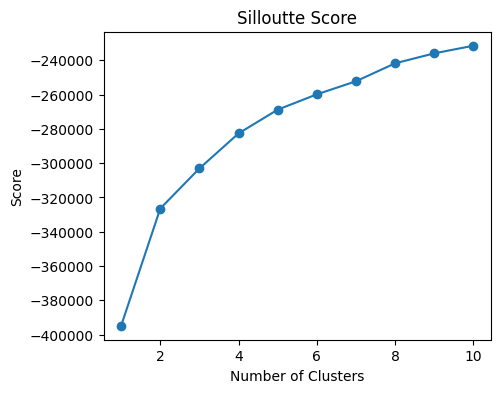

In [177]:
plt.figure(figsize=(5, 4))
plt.plot(Nc,score,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silloutte Score')
plt.show()

In [178]:
# Configura un clusterizador kmeans con inicializacion "k-means++",  3 clusters  y 12 ejecuciones
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12, random_state = 0)

# Ejecuta K-means en la data estandarizada
k_means.fit(clust04_std)
print("Inercia: ", k_means.inertia_)
print("Score: ",k_means.score(clust04_std))

Inercia:  303076.36660194077
Score:  -303076.36660194077


In [179]:
# recupera las etiquetas que  asignó k-means  a cada dato
k_means_labels = k_means.labels_

In [180]:
# obtiene los centros de los clusters que encontro k-means
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.11e-01, -1.97e+00,  3.29e+00,  2.22e+00,  1.94e+00,  1.83e+00,
         2.21e-01,  1.60e+00,  5.91e-01,  1.45e-01,  3.45e+00,  7.56e-01,
         1.01e+00,  2.83e-01,  7.81e-01,  5.05e-01,  1.06e+00,  9.68e-01,
         2.02e+00,  2.14e+00,  2.99e+00,  1.10e+00,  3.30e+00,  1.85e+00,
         3.84e-01,  3.18e+00,  1.33e+00,  2.35e-01,  2.31e+00,  7.62e-01,
         1.65e+00,  2.01e-01,  1.12e+00,  3.03e+00,  3.26e+00,  2.25e+00,
         2.12e+00,  6.40e-01,  3.19e+00,  9.86e-01,  2.87e+00,  1.70e+00,
         2.06e+00,  3.42e+00,  3.91e-01,  4.18e-01,  3.29e-01,  3.14e-01,
         3.41e-01, -7.28e-02,  7.64e-01,  1.00e+00,  7.52e-01],
       [ 7.67e-02,  8.30e-02,  3.44e-02, -1.66e-01, -8.13e-02,  2.05e-02,
         7.10e-01,  7.74e-02,  3.01e-04,  1.40e-01, -5.77e-02,  1.71e-02,
        -8.43e-02, -9.39e-02,  2.21e-02,  2.39e-01,  2.17e-01,  3.26e-01,
        -1.39e-01, -1.23e-01, -1.10e-01,  2.62e-01,  1.65e-02,  1.63e-01,
         5.06e-01, -1.04e-01, -6.11e-02, -1.40e-

In [182]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la data estandarizada
clust04_std['cluster_std'] = k_means_labels
clust04_std.sample(5)

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,ubigeo_inei,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,cluster_std
6162,-0.001862,0.042274,-0.118178,-0.210365,-0.193752,-0.264630,-0.269064,-0.159348,-0.089428,-0.050644,...,0.095824,-0.190911,-0.298757,-0.298673,-0.29832,-0.461236,-0.453771,-0.452652,-0.350878,2
6496,1.065283,0.042274,-0.152560,-0.210365,-0.193752,-0.264630,-0.269064,-0.159348,-0.089428,-0.050644,...,1.574901,-0.190911,-0.298757,-0.298673,-0.29832,-0.461236,-0.453771,-0.452652,-0.350878,2
2673,-0.535435,0.562840,-0.393236,-0.210365,-0.193752,-0.264630,-0.269064,-0.159348,-0.089428,-0.050644,...,1.279077,-0.190911,-0.298757,-0.298673,-0.29832,0.536406,0.195968,0.726046,-0.350878,2
6481,0.531711,0.562840,-0.462000,-0.210365,-0.193752,0.228551,-0.269064,-0.159348,-0.089428,-0.050644,...,1.425613,-0.190911,-0.298757,-0.298673,-0.29832,1.201500,0.845708,0.726046,-0.350878,2
2657,1.065283,-0.478292,0.397555,-0.210365,-0.193752,1.461503,-0.269064,-0.159348,-0.089428,-0.050644,...,1.132599,-0.190911,-0.298757,-0.298673,-0.29832,1.534047,0.195968,0.726046,-0.350878,2


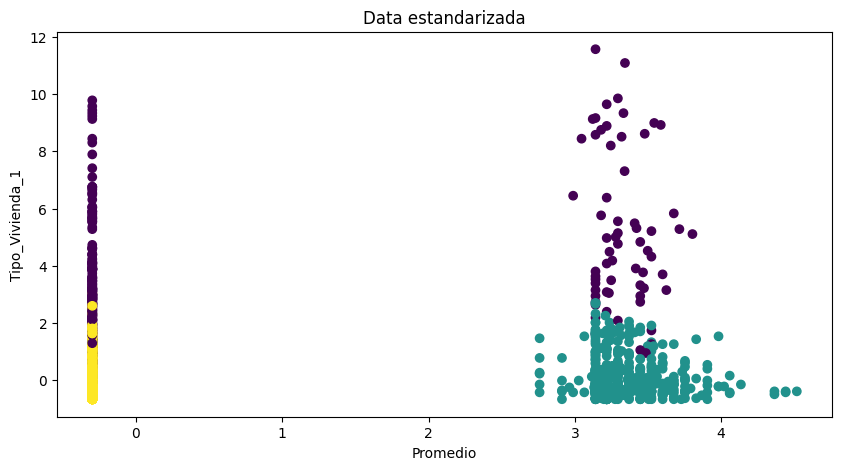

In [184]:
# muestra un scatter plot 2D de Age (estandarizado) vs Income (estandarizado)
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(clust04_std['Promedio'], clust04_std['Tipo_Vivienda_1'], c=clust04_std['cluster_std'])
plt.xlabel('Sismo promedio')
plt.ylabel('Tipo_Vivienda_1')
plt.title('Data estandarizada')
plt.show()  # muestra el plot

In [ ]:
# muestra un scatter plot 2D de Age (estandarizado) vs Income (estandarizado)
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(clust04_std['Promedio'], clust04_std['Tipo_Vivienda_1'], c=clust04_std['cluster_std'])
plt.xlabel('Sismo promedio')
plt.ylabel('Tipo_Vivienda_1')
plt.title('Data estandarizada')
plt.show()  # muestra el plot

In [194]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la data estandarizada
clust04['cluster_std'] = k_means_labels
clust04.sample(5)

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,Conteo,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,cluster_dbscan,cluster_std
Key,,,,,,,,,,,,,,,,,,,,,
LORETOMARISCAL RAMON CASTILLAPEBAS2009,7,6,12,0,0,0,8,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2
LIMA REGIONCANTALACHAQUI2005,5,6,8,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2
PUNOCHUCUITOPISACOMA2004,6,7,8,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1,2
LIMA PROVINCIALIMACARABAYLLO2006,8,1,31,0,0,1,0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2
LIMA REGIONBARRANCAPARAMONGA2008,2,4,23,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2


In [195]:
df_c2u=df_c2["UBIGEO"]
df_c2u

Key
AMAZONASBAGUAARAMANGO2007                  10202
AMAZONASBAGUABAGUA2007                     10201
AMAZONASBAGUACOPALLIN2007                  10203
AMAZONASBAGUAEL PARCO2007                  10204
AMAZONASBAGUAIMAZA2007                     10205
                                           ...  
UCAYALICORONEL PORTILLOMASISEA2004        250104
UCAYALICORONEL PORTILLOYARINACOCHA2004    250105
UCAYALIPADRE ABADCURIMANA2004             250303
UCAYALIPADRE ABADIRAZOLA2004              250302
UCAYALIPADRE ABADPADRE ABAD2004           250301
Name: UBIGEO, Length: 7450, dtype: int64

In [196]:
resultado = pd.merge(clust04, df_c2u, left_index=True, right_index=True)

In [197]:
filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/TB_UBIGEOS.csv"
df_ubigeo = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
df_ubigeo = df_ubigeo[["ubigeo_inei","latitud","longitud","region","provincia","distrito"]].copy()
df_ubigeo.head()

,ubigeo_inei,latitud,longitud,region,provincia,distrito
0,10101,-6.2294,-77.8728,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,10102,-6.0325,-77.7108,AMAZONAS,CHACHAPOYAS,ASUNCION
2,10103,-6.8358,-78.0197,AMAZONAS,CHACHAPOYAS,BALSAS
3,10104,-6.2556,-77.7008,AMAZONAS,CHACHAPOYAS,CHETO
4,10105,-6.0783,-77.7375,AMAZONAS,CHACHAPOYAS,CHILIQUIN


In [198]:
df_1PB = pd.merge(resultado, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
df_1PB.head()

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,Categoria_I-4,cluster_dbscan,cluster_std,UBIGEO,ubigeo_inei_y,latitud,longitud,region,provincia,distrito
0,7,6,27,0,0,0,0,0,0.0,0.0,...,0.0,-1,2,10202,10202,-5.4164,-78.4378,AMAZONAS,BAGUA,ARAMANGO
1,7,5,97,0,1,7,0,0,0.0,0.0,...,0.0,-1,0,10201,10201,-5.6389,-78.5311,AMAZONAS,BAGUA,BAGUA
2,7,6,16,0,0,0,0,0,0.0,0.0,...,0.0,-1,2,10203,10203,-5.6750,-78.4231,AMAZONAS,BAGUA,COPALLIN
3,7,7,8,0,0,0,0,0,0.0,0.0,...,0.0,-1,2,10204,10204,-5.6250,-78.4753,AMAZONAS,BAGUA,EL PARCO
4,7,7,8,0,0,0,14,0,0.0,0.0,...,0.0,-1,2,10205,10205,-5.1636,-78.2889,AMAZONAS,BAGUA,IMAZA


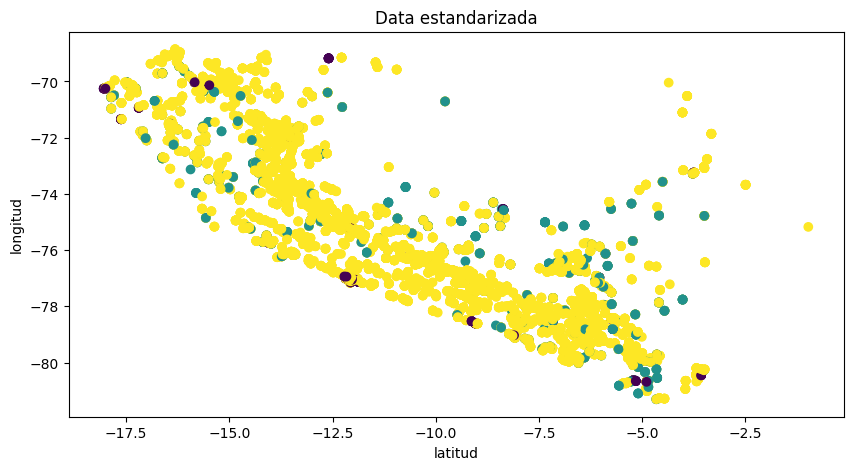

In [200]:
# muestra un scatter plot 2D de Age (estandarizado) vs Income (estandarizado)
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(df_1PB['latitud'], df_1PB['longitud'], c=df_1PB['cluster_std'])
plt.xlabel('latitud')
plt.ylabel('longitud')
plt.title('Data estandarizada')
plt.show()  # muestra el plot

### PCA

In [202]:
# aplica transformacion PCA a los datos estandarizados y obtiene  4 componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # define el transformador PCA con 4 componentes
fit_pca = pca.fit(X_standardized)  # ajusta el transformador PCA con los datos estandarizados
Xt_pca = fit_pca.transform(X_standardized) # obtiene los datos pca transformados (el resultado es un array numpy)

# muestra resultados de transformacion PCA
print("Varianza explicada por componente: {}".format(fit_pca.explained_variance_ratio_))

Varianza explicada por componente: [0.26 0.09 0.06 0.05]


In [207]:
# Configura un clusterizador kmeans con inicializacion "k-means++",  3 clusters  y 12 ejecuciones
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)

# Ejecuta K-means en la data pca transformada
k_means.fit(Xt_pca)

# recupera las etiquetas que  asignó k-means a cada dato
k_means_labels = k_means.labels_

# obtiene los centros de los clusters que encontro k-means
k_means_cluster_centers = k_means.cluster_centers_

# adiciona una columna 'cluster_pca' con las etiquetas de grupos que asignó kmeans con la data estandarizada
clust04['cluster_pca'] = k_means_labels
clust04.head()

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,cluster_dbscan,cluster_std,cluster_pca
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2007,7,6,27,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,13.0,3.0,3.0,0.0,-1,2,1
AMAZONASBAGUABAGUA2007,7,5,97,0,1,7,0,0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,1.0,0.0,-1,0,0
AMAZONASBAGUACOPALLIN2007,7,6,16,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,-1,2,1
AMAZONASBAGUAEL PARCO2007,7,7,8,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,2,1
AMAZONASBAGUAIMAZA2007,7,7,8,0,0,0,14,0,0.0,0.0,...,0.0,0.0,0.0,25.0,4.0,5.0,0.0,-1,2,1


In [208]:
resultado2 = pd.merge(clust04, df_c2u, left_index=True, right_index=True)

In [209]:
df_2PB = pd.merge(resultado2, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
df_2PB.head()

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,cluster_dbscan,cluster_std,cluster_pca,UBIGEO,ubigeo_inei_y,latitud,longitud,region,provincia,distrito
0,7,6,27,0,0,0,0,0,0.0,0.0,...,-1,2,1,10202,10202,-5.4164,-78.4378,AMAZONAS,BAGUA,ARAMANGO
1,7,5,97,0,1,7,0,0,0.0,0.0,...,-1,0,0,10201,10201,-5.6389,-78.5311,AMAZONAS,BAGUA,BAGUA
2,7,6,16,0,0,0,0,0,0.0,0.0,...,-1,2,1,10203,10203,-5.6750,-78.4231,AMAZONAS,BAGUA,COPALLIN
3,7,7,8,0,0,0,0,0,0.0,0.0,...,-1,2,1,10204,10204,-5.6250,-78.4753,AMAZONAS,BAGUA,EL PARCO
4,7,7,8,0,0,0,14,0,0.0,0.0,...,-1,2,1,10205,10205,-5.1636,-78.2889,AMAZONAS,BAGUA,IMAZA


In [212]:
df_2PB["cluster_pca"].value_counts()

1    6528
2     555
0     367
Name: cluster_pca, dtype: int64

In [214]:
df_2PB[df_2PB["cluster_pca"]==2]

,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,Tipo_Vivienda_7,Tipo_Vivienda_8,...,cluster_dbscan,cluster_std,cluster_pca,UBIGEO,ubigeo_inei_y,latitud,longitud,region,provincia,distrito
14,7,7,0,0,0,0,6,0,0.0,0.0,...,-1,1,2,10402,10402,-4.4556,-78.1589,AMAZONAS,CONDORCANQUI,EL CENEPA
15,7,7,10,0,0,0,25,0,0.0,0.0,...,-1,1,2,10401,10401,-4.5922,-77.8644,AMAZONAS,CONDORCANQUI,NIEVA
16,7,7,0,0,0,0,22,0,0.0,0.0,...,-1,1,2,10403,10403,-4.0158,-77.7608,AMAZONAS,CONDORCANQUI,RIO SANTIAGO
169,3,6,6,0,0,0,0,0,0.0,0.0,...,-1,1,2,40308,40308,-15.8053,-73.9669,AREQUIPA,CARAVELI,CHAPARRA
176,6,7,3,0,0,0,5,0,0.0,0.0,...,-1,1,2,40504,40504,-15.5064,-71.4447,AREQUIPA,CAYLLOMA,CALLALLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,3,7,19,0,0,0,0,0,0.0,0.0,...,-1,1,2,230105,230105,-17.7939,-70.4947,TACNA,TACNA,INCLAN
7440,7,7,0,0,0,0,24,0,3.0,0.0,...,-1,1,2,250201,250201,-10.7297,-73.7553,UCAYALI,ATALAYA,RAYMONDI
7445,7,7,4,0,0,0,29,0,0.0,0.0,...,-1,2,2,250104,250104,-8.6047,-74.3061,UCAYALI,CORONEL PORTILLO,MASISEA
7446,7,4,64,0,0,0,18,1,0.0,0.0,...,-1,1,2,250105,250105,-8.3556,-74.5758,UCAYALI,CORONEL PORTILLO,YARINACOCHA


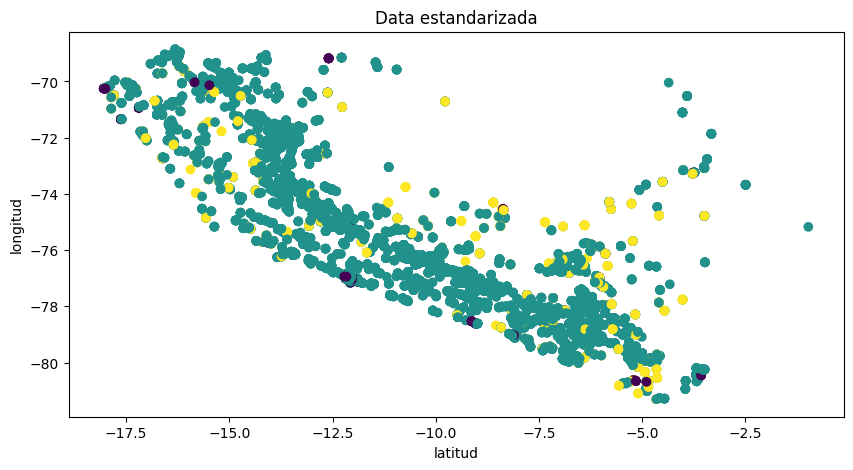

In [210]:
# muestra un scatter plot 2D de Age (estandarizado) vs Income (estandarizado)
plt.figure(figsize=(10,5)) # define tamaño de figura
plt.scatter(df_2PB['latitud'], df_2PB['longitud'], c=df_2PB['cluster_pca'])
plt.xlabel('latitud')
plt.ylabel('longitud')
plt.title('Data estandarizada')
plt.show()  # muestra el plot

### **DSCAN**

In [ ]:
# importa libreria DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
prob=df_customers_std.iloc[:,:-3].copy()
prob.head()  #previa estandarizacion

In [ ]:
#Probar con los siguientes parametros en DBSCAN
epsilon = 1
minimumSamples =30
db = DBSCAN(eps=1, min_samples=30).fit(prob)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
prob['cluster_DBSCAN'] = labels
prob.sample(5)